##Dataset from Drive

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importing the Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plto
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import os

dataset_path = os.listdir('/content/drive/MyDrive/Acnedataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Level_1', 'Level_2', 'Level_0']
Types of classes labels found:  3


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/Acnedataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('/content/drive/MyDrive/Acnedataset' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [ ]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

    Labels                                              image
0  Level_1  /content/drive/MyDrive/Acnedataset/Level_1/lev...
1  Level_1  /content/drive/MyDrive/Acnedataset/Level_1/lev...
2  Level_1  /content/drive/MyDrive/Acnedataset/Level_1/lev...
3  Level_1  /content/drive/MyDrive/Acnedataset/Level_1/lev...
4  Level_1  /content/drive/MyDrive/Acnedataset/Level_1/lev...
      Labels                                              image
994  Level_0  /content/drive/MyDrive/Acnedataset/Level_0/lev...
995  Level_0  /content/drive/MyDrive/Acnedataset/Level_0/lev...
996  Level_0  /content/drive/MyDrive/Acnedataset/Level_0/lev...
997  Level_0  /content/drive/MyDrive/Acnedataset/Level_0/lev...
998  Level_0  /content/drive/MyDrive/Acnedataset/Level_0/lev...


### Classification of the image categories

In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  999
Level_1    473
Level_0    387
Level_2    139
Name: Labels, dtype: int64


###Image standardisation and Greyscale Conversion

In [ ]:
import cv2
path = '/content/drive/MyDrive/Acnedataset/'
dataset_path = os.listdir('/content/drive/MyDrive/Acnedataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)
#To avoid distortion of intensities of image
images = images.astype('float32') / 255.0
images.shape

(999, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1' 'Level_1'
 'Leve

In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


###splitting of train and test data

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(949, 224, 224, 3)
(949, 3)
(50, 224, 224, 3)
(50, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
image_size = 224
size = (image_size, image_size)
# Using model without transfer learning
effnet = EfficientNetB0(weights=None,include_top= False,input_shape=(image_size,image_size,3)) 
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.2)(model)
model = tf.keras.layers.Dense(3,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=20, verbose=1,validation_data=(test_x, test_y))

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_9 (Rescaling)        (None, 224, 224, 3)  0           ['input_10[0][0]']               
                                                                                                  
 normalization_9 (Normalization  (None, 224, 224, 3)  7          ['rescaling_9[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
#reducing learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1) 

In [ ]:
hist = model.fit(train_x,train_y,validation_split=0.1, epochs =30, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.1510 - accuracy: 0.9532
Epoch 1: val_accuracy improved from -inf to 0.46316, saving model to effnet.h5
27/27 [==============================] - 10s 351ms/step - loss: 0.1510 - accuracy: 0.9532 - val_loss: 1.4781 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9660
Epoch 2: val_accuracy improved from 0.46316 to 0.48421, saving model to effnet.h5
27/27 [==============================] - 9s 351ms/step - loss: 0.1035 - accuracy: 0.9660 - val_loss: 1.4087 - val_accuracy: 0.4842 - lr: 0.0010
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9590
Epoch 3: val_accuracy improved from 0.48421 to 0.60000, saving model to effnet.h5
27/27 [==============================] - 10s 353ms/step - loss: 0.1183 - accuracy: 0.9590 - val_loss: 0.9628 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/30
27/27 [=======================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


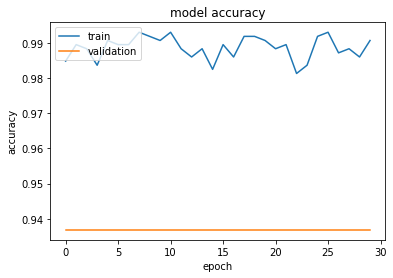

In [ ]:
import matplotlib.pyplot as plt

print(hist.history.keys())
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

# import matplotlib.pyplot as plt
# # list all data in history
# print(hist.history.keys())
# # summarize history for accuracy
# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','test'])
# plt.show()

# summarize history for loss
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend()
